### Assignment 5.1
Section 3.4

In [79]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [80]:
max([max(sequence) for sequence in train_data])

9999

In [81]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [82]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [83]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [84]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [87]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [88]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5059 - acc: 0.7801 - val_loss: 0.4060 - val_acc: 0.8346
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2931 - acc: 0.9004 - val_loss: 0.2938 - val_acc: 0.8898
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2100 - acc: 0.9312 - val_loss: 0.2782 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1711 - acc: 0.9435 - val_loss: 0.2757 - val_acc: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1372 - acc: 0.9559 - val_loss: 0.2874 - val_acc: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1121 - acc: 0.9660 - val_loss: 0.3008 - val_acc: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0950 - acc: 0.9721 - val_loss: 0.3478 - val_acc: 0.8774
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0781 - acc: 0.9

In [89]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

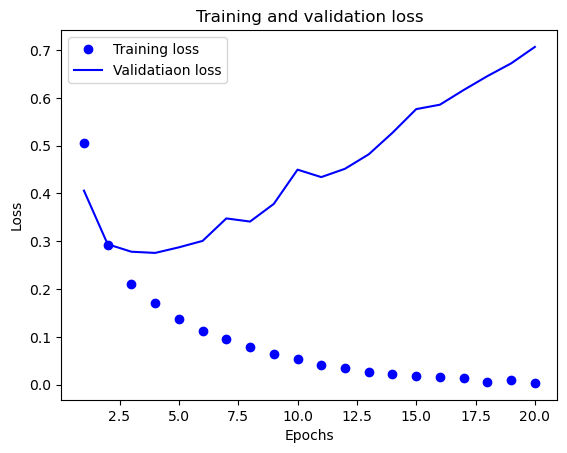

In [90]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs,loss_values, 'bo', label="Training loss")
plt.plot(epochs,val_loss_values, 'b', label="Validatiaon loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


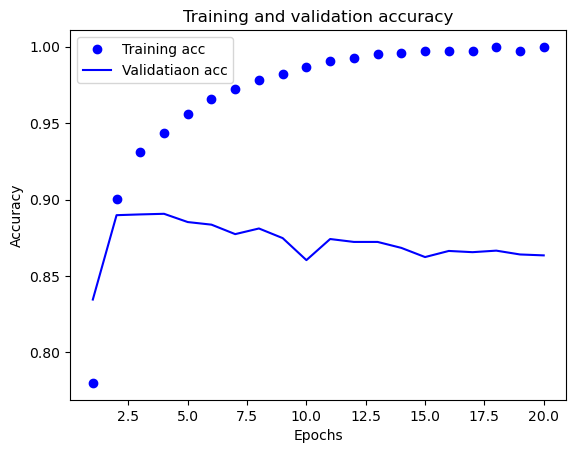

In [91]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validatiaon acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [92]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 4ms/step - loss: 0.4761 - accuracy: 0.8186
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.9066
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2069 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 13s 17ms/step - loss: 0.2972 - accuracy: 0.8820


In [93]:
results

[0.2972390949726105, 0.8819599747657776]

In [94]:
model.predict(x_test)

782/782 [==============================] - 23s 29ms/step


array([[0.14347336],
       [0.9999418 ],
       [0.831859  ],
       ...,
       [0.10431504],
       [0.06340731],
       [0.41998455]], dtype=float32)

In [95]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_1 = model_1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16,activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_2 = model_2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(16,activation='relu'))
model_3.add(layers.Dense(16,activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_3 = model_3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


history_dict_1 = history_1.history
history_dict_2 = history_2.history
history_dict_3 = history_3.history

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4982 - acc: 0.7992 - val_loss: 0.3863 - val_acc: 0.8670
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3117 - acc: 0.9046 - val_loss: 0.3310 - val_acc: 0.8749
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2413 - acc: 0.9259 - val_loss: 0.2946 - val_acc: 0.8863
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1987 - acc: 0.9387 - val_loss: 0.2797 - val_acc: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1677 - acc: 0.9507 - val_loss: 0.2744 - val_acc: 0.8907
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1465 - acc: 0.9571 - val_loss: 0.2778 - val_acc: 0.8879
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1279 - acc: 0.9637 - val_loss: 0.2870 - val_acc: 0.8850
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1119 - acc: 0.

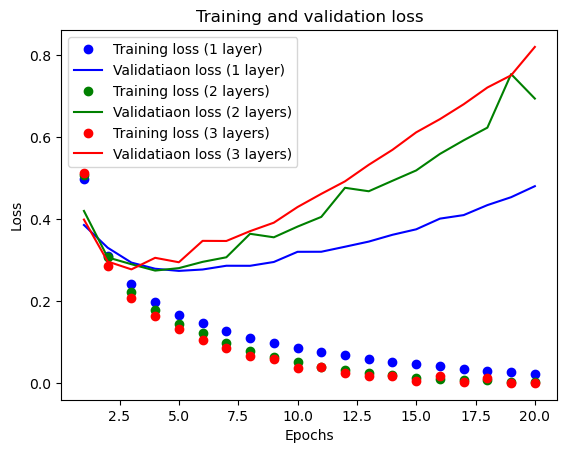

In [97]:
loss_values_1 = history_dict_1['loss']
val_loss_values_1 = history_dict_1['val_loss']

loss_values_2 = history_dict_2['loss']
val_loss_values_2 = history_dict_2['val_loss']

loss_values_3 = history_dict_3['loss']
val_loss_values_3 = history_dict_3['val_loss']

epochs = range(1, len(loss_values_1) + 1)

plt.plot(epochs,loss_values_1, 'bo', label="Training loss (1 layer)")
plt.plot(epochs,val_loss_values_1, 'b', label="Validatiaon loss (1 layer)")
plt.plot(epochs,loss_values_2, 'go', label="Training loss (2 layers)")
plt.plot(epochs,val_loss_values_2, 'g', label="Validatiaon loss (2 layers)")
plt.plot(epochs,loss_values_3, 'ro', label="Training loss (3 layers)")
plt.plot(epochs,val_loss_values_3, 'r', label="Validatiaon loss (3 layers)")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

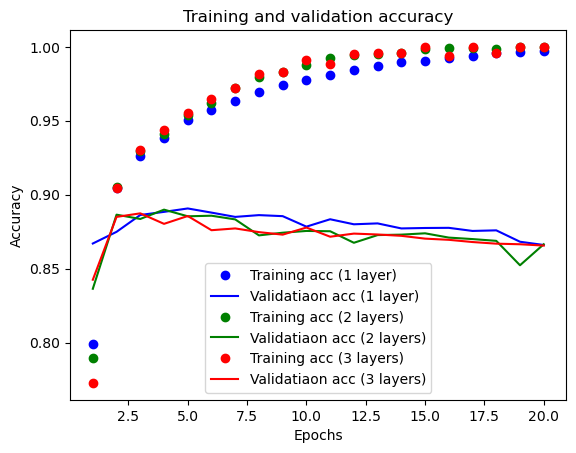

In [98]:
plt.clf()

acc_1 = history_dict_1['acc']
val_acc_1 = history_dict_1['val_acc']
acc_2 = history_dict_2['acc']
val_acc_2 = history_dict_2['val_acc']
acc_3 = history_dict_3['acc']
val_acc_3 = history_dict_3['val_acc']

plt.plot(epochs, acc_1, 'bo', label="Training acc (1 layer)")
plt.plot(epochs, val_acc_1, 'b', label="Validatiaon acc (1 layer)")
plt.plot(epochs, acc_2, 'go', label="Training acc (2 layers)")
plt.plot(epochs, val_acc_2, 'g', label="Validatiaon acc (2 layers)")
plt.plot(epochs, acc_3, 'ro', label="Training acc (3 layers)")
plt.plot(epochs, val_acc_3, 'r', label="Validatiaon acc (3 layers)")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
model_16 = models.Sequential()
model_16.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_16.add(layers.Dense(16,activation='relu'))
model_16.add(layers.Dense(1, activation='sigmoid'))

model_16.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_16 = model_16.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_32.add(layers.Dense(32,activation='relu'))
model_32.add(layers.Dense(1, activation='sigmoid'))

model_32.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_32 = model_32.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model_64 = models.Sequential()
model_64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_64.add(layers.Dense(64,activation='relu'))
model_64.add(layers.Dense(1, activation='sigmoid'))

model_64.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_64 = model_64.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


history_dict_16 = history_16.history
history_dict_32 = history_32.history
history_dict_64 = history_64.history

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5080 - acc: 0.7830 - val_loss: 0.3770 - val_acc: 0.8749
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2946 - acc: 0.9065 - val_loss: 0.3050 - val_acc: 0.8842
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2168 - acc: 0.9287 - val_loss: 0.2970 - val_acc: 0.8820
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1695 - acc: 0.9469 - val_loss: 0.2983 - val_acc: 0.8816
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1398 - acc: 0.9544 - val_loss: 0.3147 - val_acc: 0.8768
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1183 - acc: 0.9631 - val_loss: 0.2979 - val_acc: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0956 - acc: 0.9721 - val_loss: 0.3242 - val_acc: 0.8800
Epoch 8/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0804 - acc: 0.

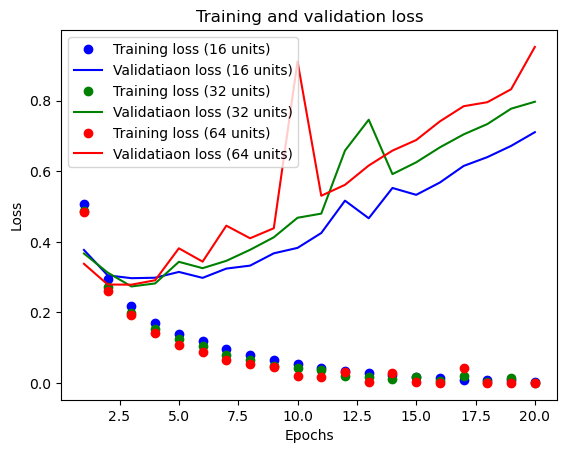

In [ ]:
loss_values_16 = history_dict_16['loss']
val_loss_values_16 = history_dict_16['val_loss']

loss_values_32 = history_dict_32['loss']
val_loss_values_32 = history_dict_32['val_loss']

loss_values_64 = history_dict_64['loss']
val_loss_values_64 = history_dict_64['val_loss']

epochs = range(1, len(loss_values_64) + 1)

plt.plot(epochs,loss_values_16, 'bo', label="Training loss (16 units)")
plt.plot(epochs,val_loss_values_16, 'b', label="Validatiaon loss (16 units)")
plt.plot(epochs,loss_values_32, 'go', label="Training loss (32 units)")
plt.plot(epochs,val_loss_values_32, 'g', label="Validatiaon loss (32 units)")
plt.plot(epochs,loss_values_64, 'ro', label="Training loss (64 units)")
plt.plot(epochs,val_loss_values_64, 'r', label="Validatiaon loss (64 units)")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

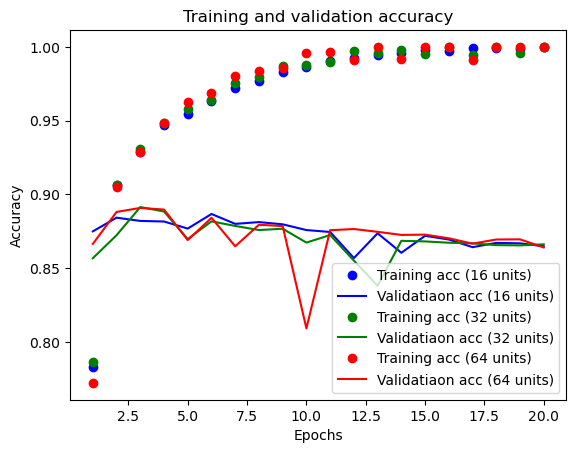

In [ ]:
plt.clf()

acc_16 = history_dict_16['acc']
val_acc_16 = history_dict_16['val_acc']
acc_32 = history_dict_32['acc']
val_acc_32 = history_dict_32['val_acc']
acc_64 = history_dict_64['acc']
val_acc_64 = history_dict_64['val_acc']

plt.plot(epochs, acc_16, 'bo', label="Training acc (16 units)")
plt.plot(epochs, val_acc_16, 'b', label="Validatiaon acc (16 units)")
plt.plot(epochs, acc_32, 'go', label="Training acc (32 units)")
plt.plot(epochs, val_acc_32, 'g', label="Validatiaon acc (32 units)")
plt.plot(epochs, acc_64, 'ro', label="Training acc (64 units)")
plt.plot(epochs, val_acc_64, 'r', label="Validatiaon acc (64 units)")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
model_bin = models.Sequential()
model_bin.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_bin.add(layers.Dense(16,activation='relu'))
model_bin.add(layers.Dense(1, activation='sigmoid'))

model_bin.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_bin = model_bin.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict_bin = history_bin.history

model_mse = models.Sequential()
model_mse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(16,activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

model_mse.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['acc'])

history_mse = model_mse.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict_mse = history_mse.history




Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5380 - acc: 0.7799 - val_loss: 0.4071 - val_acc: 0.8757
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3256 - acc: 0.9006 - val_loss: 0.3109 - val_acc: 0.8905
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2335 - acc: 0.9253 - val_loss: 0.2797 - val_acc: 0.8911
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1841 - acc: 0.9409 - val_loss: 0.3197 - val_acc: 0.8700
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1513 - acc: 0.9515 - val_loss: 0.2958 - val_acc: 0.8812
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1217 - acc: 0.9635 - val_loss: 0.2926 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1017 - acc: 0.9693 - val_loss: 0.3045 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0847 - acc: 0

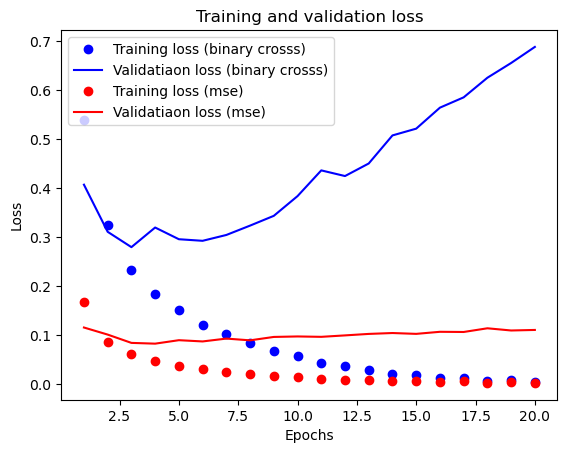

In [ ]:
loss_values_bin = history_dict_bin['loss']
val_loss_values_bin = history_dict_bin['val_loss']

loss_values_mse = history_dict_mse['loss']
val_loss_values_mse = history_dict_mse['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values_bin, 'bo', label="Training loss (binary crosss)")
plt.plot(epochs, val_loss_values_bin, 'b', label="Validatiaon loss (binary crosss)")
plt.plot(epochs, loss_values_mse, 'ro', label="Training loss (mse)")
plt.plot(epochs, val_loss_values_mse, 'r', label="Validatiaon loss (mse)")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


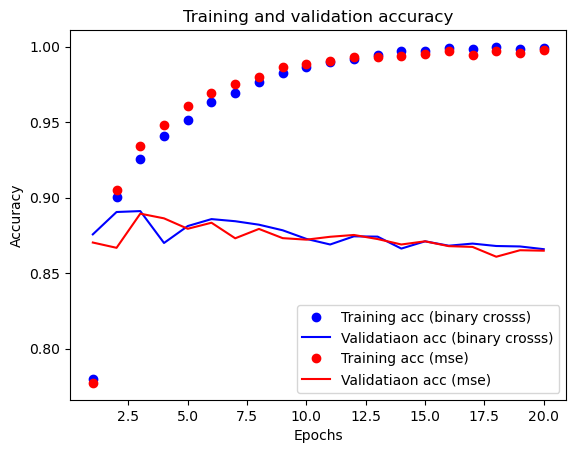

In [ ]:
plt.clf()

acc_bin = history_dict_bin['acc']
val_acc_bin = history_dict_bin['val_acc']
acc_mse = history_dict_mse['acc']
val_acc_mse = history_dict_mse['val_acc']

plt.plot(epochs, acc_bin, 'bo', label="Training acc (binary crosss)")
plt.plot(epochs, val_acc_bin, 'b', label="Validatiaon acc (binary crosss)")
plt.plot(epochs, acc_mse, 'ro', label="Training acc (mse)")
plt.plot(epochs, val_acc_mse, 'r', label="Validatiaon acc (mse)")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
model_relu = models.Sequential()
model_relu.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_relu.add(layers.Dense(16,activation='relu'))
model_relu.add(layers.Dense(1, activation='sigmoid'))

model_relu.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_relu = model_relu.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict_relu = history_relu.history

model_tanh = models.Sequential()
model_tanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_tanh.add(layers.Dense(16,activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid'))

model_tanh.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history_tanh = model_tanh.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict_tanh = history_tanh.history


Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5102 - acc: 0.7929 - val_loss: 0.3876 - val_acc: 0.8711
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3110 - acc: 0.9021 - val_loss: 0.3095 - val_acc: 0.8888
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2270 - acc: 0.9295 - val_loss: 0.3152 - val_acc: 0.8727
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1779 - acc: 0.9441 - val_loss: 0.2955 - val_acc: 0.8804
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1448 - acc: 0.9549 - val_loss: 0.2784 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1150 - acc: 0.9647 - val_loss: 0.2928 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0968 - acc: 0.9702 - val_loss: 0.3082 - val_acc: 0.8830
Epoch 8/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0773 - acc: 0.

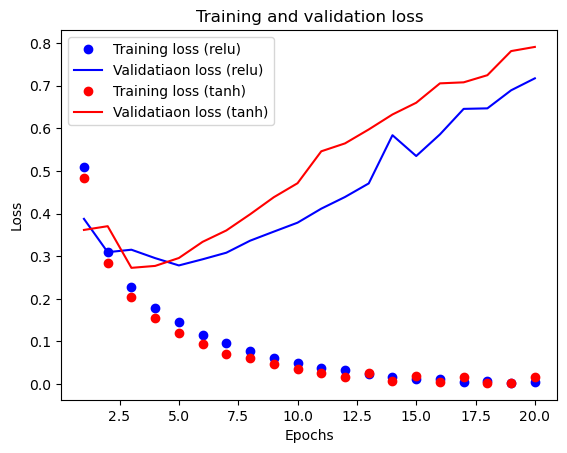

In [ ]:
loss_values_relu = history_dict_relu['loss']
val_loss_values_relu = history_dict_relu['val_loss']

loss_values_tanh = history_dict_tanh['loss']
val_loss_values_tanh = history_dict_tanh['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values_relu, 'bo', label="Training loss (relu)")
plt.plot(epochs, val_loss_values_relu, 'b', label="Validatiaon loss (relu)")
plt.plot(epochs, loss_values_tanh, 'ro', label="Training loss (tanh)")
plt.plot(epochs, val_loss_values_tanh, 'r', label="Validatiaon loss (tanh)")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

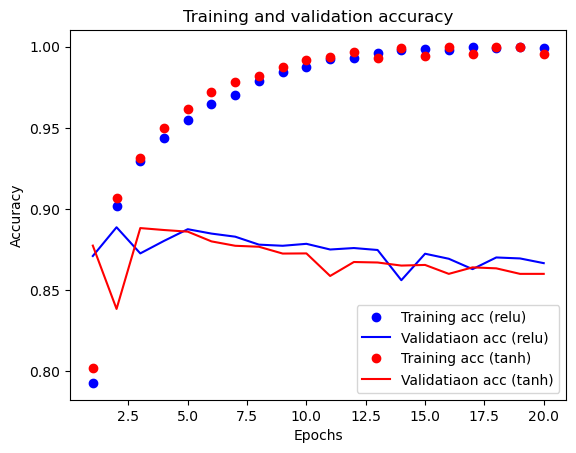

In [ ]:
plt.clf()

acc_relu = history_dict_relu['acc']
val_acc_relu = history_dict_relu['val_acc']
acc_tanh = history_dict_tanh['acc']
val_acc_tanh = history_dict_tanh['val_acc']

plt.plot(epochs, acc_relu, 'bo', label="Training acc (relu)")
plt.plot(epochs, val_acc_relu, 'b', label="Validatiaon acc (relu)")
plt.plot(epochs, acc_tanh, 'ro', label="Training acc (tanh)")
plt.plot(epochs, val_acc_tanh, 'r', label="Validatiaon acc (tanh)")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Assignment 5.2
Section 3.5

In [99]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [100]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [101]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

train_labels[10]

3

In [102]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [103]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [104]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [105]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.5777 - acc: 0.5279 - val_loss: 1.7344 - val_acc: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4191 - acc: 0.7096 - val_loss: 1.2960 - val_acc: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0512 - acc: 0.7829 - val_loss: 1.1259 - val_acc: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8199 - acc: 0.8326 - val_loss: 1.0295 - val_acc: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6500 - acc: 0.8637 - val_loss: 0.9482 - val_acc: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5155 - acc: 0.8928 - val_loss: 0.9303 - val_acc: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4141 - acc: 0.9143 - val_loss: 0.9377 - val_acc: 0.7900
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3388 - acc: 

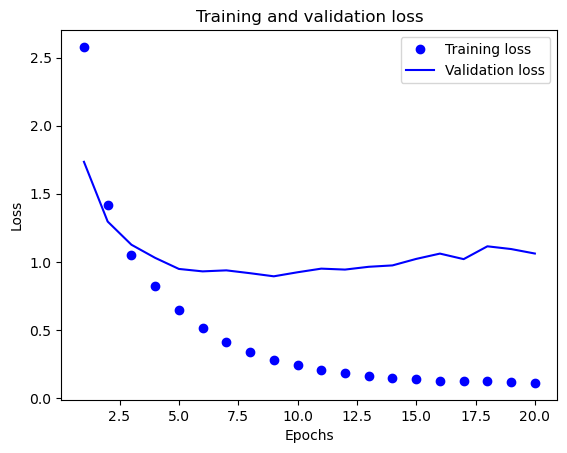

In [106]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

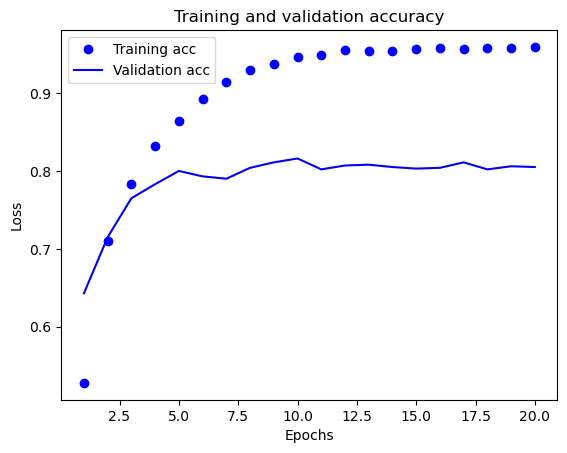

In [107]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [108]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/8
16/16 [==============================] - 1s 24ms/step - loss: 2.7395 - acc: 0.5322 - val_loss: 1.7931 - val_acc: 0.6450
Epoch 2/8
16/16 [==============================] - 0s 11ms/step - loss: 1.4607 - acc: 0.7031 - val_loss: 1.3090 - val_acc: 0.7180
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0547 - acc: 0.7752 - val_loss: 1.1179 - val_acc: 0.7540
Epoch 4/8
16/16 [==============================] - 0s 10ms/step - loss: 0.8190 - acc: 0.8257 - val_loss: 1.0161 - val_acc: 0.7860
Epoch 5/8
16/16 [==============================] - 0s 10ms/step - loss: 0.6521 - acc: 0.8604 - val_loss: 0.9635 - val_acc: 0.7900
Epoch 6/8
16/16 [==============================] - 0s 10ms/step - loss: 0.5201 - acc: 0.8931 - val_loss: 0.9542 - val_acc: 0.7830
Epoch 7/8
16/16 [==============================] - 0s 10ms/step - loss: 0.4209 - acc: 0.9108 - val_loss: 0.9073 - val_acc: 0.8080
Epoch 8/8
71/71 [==============================] - 1s 20ms/step - loss: 0.9947 - acc: 0.78

[0.9946668148040771, 0.7827248573303223]

In [109]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18165627782724844

In [110]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 2s 33ms/step


(46,)

In [111]:
np.sum(predictions[0])

1.0000001

In [112]:
np.argmax(predictions[0])

3

In [113]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.8850 - accuracy: 0.3760 - val_loss: 2.0033 - val_accuracy: 0.5820
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.6445 - accuracy: 0.6255 - val_loss: 1.4635 - val_accuracy: 0.6400
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2869 - accuracy: 0.6740 - val_loss: 1.3605 - val_accuracy: 0.6580
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1184 - accuracy: 0.7170 - val_loss: 1.3060 - val_accuracy: 0.6850
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9973 - accuracy: 0.7423 - val_loss: 1.2793 - val_accuracy: 0.6940
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9037 - accuracy: 0.7662 - val_loss: 1.2910 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.8226 - accuracy: 0.7849 - val_loss: 1.2974 - val_accuracy: 0.6990
Epoch 8/20
63/63 [==

In [114]:
model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_32.add(layers.Dense(32, activation='relu'))
model_32.add(layers.Dense(46, activation='softmax'))

model_32.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history_32 = model_32.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model_64 = models.Sequential()
model_64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_64.add(layers.Dense(64, activation='relu'))
model_64.add(layers.Dense(46, activation='softmax'))

model_64.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history_64 = model_64.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model_128 = models.Sequential()
model_128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_128.add(layers.Dense(128, activation='relu'))
model_128.add(layers.Dense(46, activation='softmax'))

model_128.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history_128 = model_128.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.9694 - acc: 0.4996 - val_loss: 2.2671 - val_acc: 0.6080
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.8988 - acc: 0.6689 - val_loss: 1.6634 - val_acc: 0.6600
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.4275 - acc: 0.7093 - val_loss: 1.3851 - val_acc: 0.6980
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 1.1665 - acc: 0.7464 - val_loss: 1.2350 - val_acc: 0.7240
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.9875 - acc: 0.7871 - val_loss: 1.1529 - val_acc: 0.7430
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8462 - acc: 0.8151 - val_loss: 1.0762 - val_acc: 0.7660
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.7302 - acc: 0.8405 - val_loss: 1.0372 - val_acc: 0.7680
Epoch 8/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6306 - acc: 0.

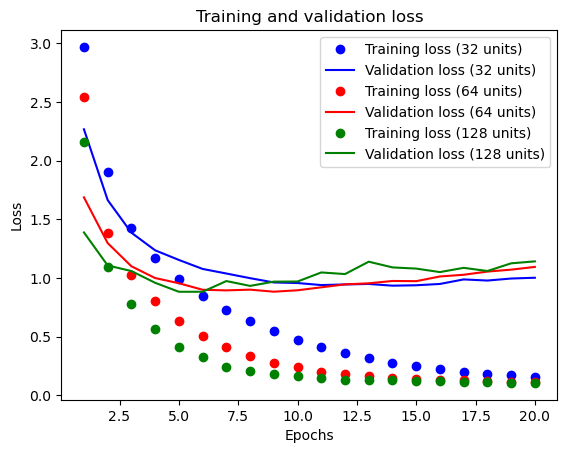

In [115]:
loss_32 = history_32.history['loss']
val_loss_32 = history_32.history['val_loss']

loss_64 = history_64.history['loss']
val_loss_64 = history_64.history['val_loss']

loss_128 = history_128.history['loss']
val_loss_128 = history_128.history['val_loss']

epochs = range(1, len(loss_32) + 1)

plt.plot(epochs, loss_32, 'bo', label='Training loss (32 units)')
plt.plot(epochs, val_loss_32, 'b', label='Validation loss (32 units)')
plt.plot(epochs, loss_64, 'ro', label='Training loss (64 units)')
plt.plot(epochs, val_loss_64, 'r', label='Validation loss (64 units)')
plt.plot(epochs, loss_128, 'go', label='Training loss (128 units)')
plt.plot(epochs, val_loss_128, 'g', label='Validation loss (128 units)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

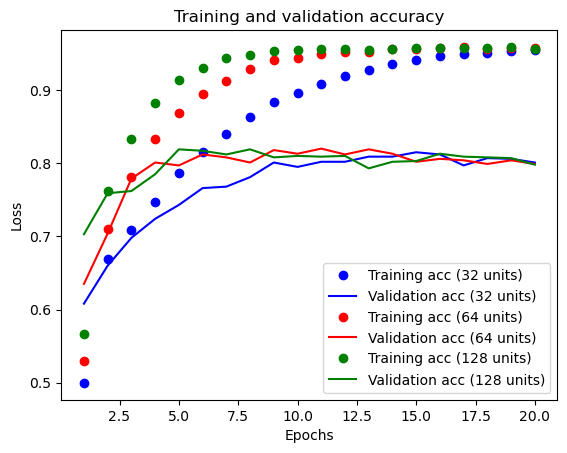

In [116]:
plt.clf()

acc_32 = history_32.history['acc']
val_acc_32 = history_32.history['val_acc']

acc_64 = history_64.history['acc']
val_acc_64 = history_64.history['val_acc']

acc_128 = history_128.history['acc']
val_acc_128 = history_128.history['val_acc']

plt.plot(epochs, acc_32, 'bo', label='Training acc (32 units)')
plt.plot(epochs, val_acc_32, 'b', label='Validation acc (32 units)')
plt.plot(epochs, acc_64, 'ro', label='Training acc (64 units)')
plt.plot(epochs, val_acc_64, 'r', label='Validation acc (64 units)')
plt.plot(epochs, acc_128, 'go', label='Training acc (128 units)')
plt.plot(epochs, val_acc_128, 'g', label='Validation acc (128 units)')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [118]:
model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(46, activation='softmax'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history_1 = model_1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


model_2 = models.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))

model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history_2 = model_2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


model_3 = models.Sequential()
model_3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(46, activation='softmax'))

model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history_3 = model_3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 3.2847 - acc: 0.5055 - val_loss: 2.7193 - val_acc: 0.6290
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 2.2841 - acc: 0.6721 - val_loss: 1.9871 - val_acc: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.6616 - acc: 0.7187 - val_loss: 1.5624 - val_acc: 0.7140
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2881 - acc: 0.7625 - val_loss: 1.3153 - val_acc: 0.7380
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0535 - acc: 0.7912 - val_loss: 1.1691 - val_acc: 0.7550
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8889 - acc: 0.8197 - val_loss: 1.0735 - val_acc: 0.7840
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.7637 - acc: 0.8454 - val_loss: 1.0082 - val_acc: 0.7910
Epoch 8/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6627 - acc: 0.

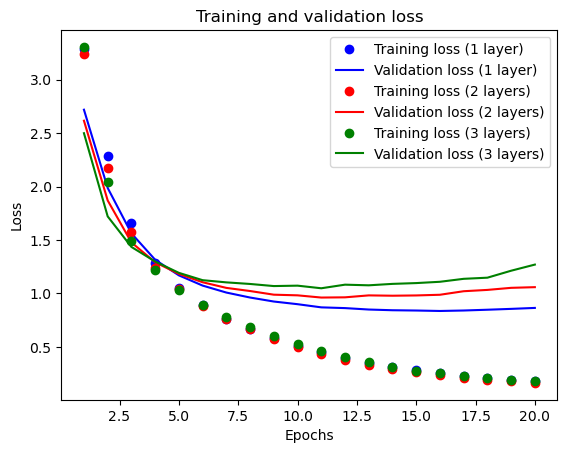

In [119]:
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs = range(1, len(loss_32) + 1)

plt.plot(epochs, loss_1, 'bo', label='Training loss (1 layer)')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss (1 layer)')
plt.plot(epochs, loss_2, 'ro', label='Training loss (2 layers)')
plt.plot(epochs, val_loss_2, 'r', label='Validation loss (2 layers)')
plt.plot(epochs, loss_3, 'go', label='Training loss (3 layers)')
plt.plot(epochs, val_loss_3, 'g', label='Validation loss (3 layers)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

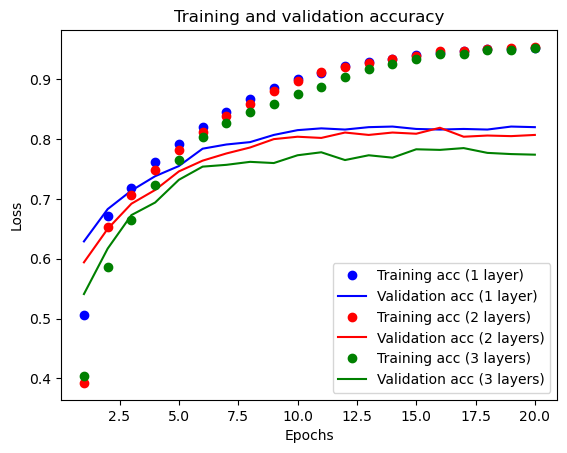

In [121]:
plt.clf()

acc_1 = history_1.history['acc']
val_acc_1 = history_1.history['val_acc']

acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']

acc_3 = history_3.history['acc']
val_acc_3 = history_3.history['val_acc']

plt.plot(epochs, acc_1, 'bo', label='Training acc (1 layer)')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc (1 layer)')
plt.plot(epochs, acc_2, 'ro', label='Training acc (2 layers)')
plt.plot(epochs, val_acc_2, 'r', label='Validation acc (2 layers)')
plt.plot(epochs, acc_3, 'go', label='Training acc (3 layers)')
plt.plot(epochs, val_acc_3, 'g', label='Validation acc (3 layers)')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()